In [1]:
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords
import string

In [2]:
df = pd.read_csv('spam.csv', encoding = "ISO-8859-1")
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [3]:
df1 = df[['v1', 'v2']]
ems=df1.rename(columns={'v1':'Output','v2':'Mail'})
ems

,Output,Mail
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [4]:
ems.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Output  5572 non-null   object
 1   Mail    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [5]:
ems.describe()

,Output,Mail
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [6]:
ems.notnull().sum()

Output    5572
Mail      5572
dtype: int64

In [7]:
ems.isnull().sum()

Output    0
Mail      0
dtype: int64

In [8]:
ems.duplicated().sum()

403

In [47]:
ems.drop_duplicates(inplace=True)

In [10]:
ems.shape

(5169, 2)

In [11]:
ems.isnull().sum()

Output    0
Mail      0
dtype: int64

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [13]:
pip install stopwords

Note: you may need to restart the kernel to use updated packages.


In [14]:
def process_text(Mail):
    nopun =[char for char in Mail if char not in string.punctuation]   
    nopun =''.join(nopun)
    clw = [word for word in nopun.split() if word.lower() not in stopwords.words('english')]
    return clw    

In [15]:
ems['Mail'].head().apply(process_text)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: Mail, dtype: object

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
msg_bag= CountVectorizer(analyzer=process_text).fit_transform(ems['Mail'])

In [38]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(msg_bag,ems['Output'],test_size=0.50,random_state=0)

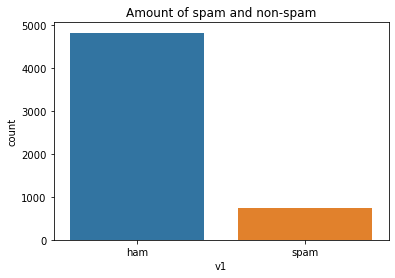

In [18]:
sns.countplot(x = df1["v1"]).set_title("Amount of spam and non-spam")
plt.show()

In [19]:
msg_bag.shape

(5169, 11304)

In [39]:
from sklearn.naive_bayes import MultinomialNB
classified=MultinomialNB().fit(x_train,y_train)

In [40]:
print(classified.predict(x_train))

print(y_train.values)

['ham' 'ham' 'ham' ... 'ham' 'ham' 'ham']
['ham' 'ham' 'ham' ... 'ham' 'ham' 'ham']


In [41]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
pred=classified.predict(x_train)
print(classification_report(y_train,pred))

              precision    recall  f1-score   support

         ham       1.00      1.00      1.00      2265
        spam       0.99      0.98      0.98       319

    accuracy                           1.00      2584
   macro avg       0.99      0.99      0.99      2584
weighted avg       1.00      1.00      1.00      2584



In [42]:
print('Confusion Matrix:\n', confusion_matrix(y_train,pred))

Confusion Matrix:
 [[2261    4]
 [   6  313]]


In [43]:
print('Accuracy:\n',accuracy_score(y_train,pred))

Accuracy:
 0.9961300309597523


In [44]:
print(classified.predict(x_test))

print(y_test.values)

['ham' 'ham' 'ham' ... 'ham' 'ham' 'ham']
['ham' 'ham' 'ham' ... 'ham' 'ham' 'ham']


In [45]:
pred=classified.predict(x_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         ham       0.98      0.97      0.98      2251
        spam       0.84      0.88      0.86       334

    accuracy                           0.96      2585
   macro avg       0.91      0.93      0.92      2585
weighted avg       0.96      0.96      0.96      2585



In [27]:
print('Confusion Matrix:\n', confusion_matrix(y_test,pred))

Confusion Matrix:
 [[2193   58]
 [  40  294]]


In [46]:
print('Accuracy:\n',accuracy_score(y_test,pred))

Accuracy:
 0.9620889748549323


In [29]:
pip install tensorflow

In [30]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split